In [2]:
# Project
# CS6375 Machine Learning
# Created by: Xinyang Zhu, Ye Yao
# Time: November 2018
####################################################################
# 0 Start

# import libraries
import numpy as np
import pandas as pd

####################################################################
# 1 Load Data
# directory path
dir_path = "./dataset/"

# set the urls of dataset
train_values_url = dir_path + "Warm_Up_Machine_Learning_with_a_Heart_-_Train_Values.csv"
train_labels_url = dir_path + "Warm_Up_Machine_Learning_with_a_Heart_-_Train_Labels.csv"

# load dataset
values_df = pd.read_csv(train_values_url)
labels_df = pd.read_csv(train_labels_url)

In [5]:
####################################################################
# 1.2 Data Exploration
import seaborn as sns
values_df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [16]:
values_df.dtypes

patient_id                               object
slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
dtype: object

In [11]:
labels_df.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [17]:
labels_df.dtypes

patient_id               object
heart_disease_present     int64
dtype: object

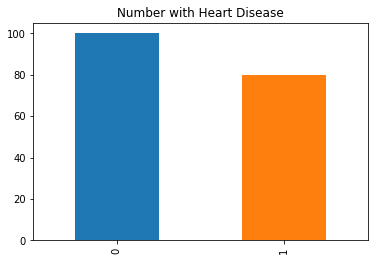

In [6]:
labels_df.heart_disease_present.value_counts().plot.bar(title='Number with Heart Disease')

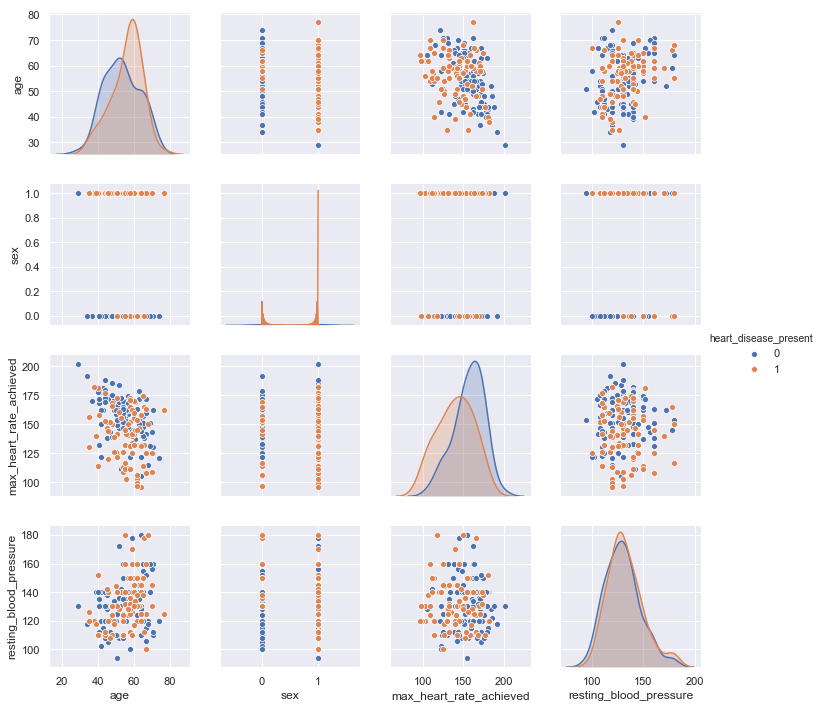

In [40]:
features_to_show = [ 'age', 
                     'sex', 
                     'max_heart_rate_achieved', 
                     'resting_blood_pressure',
                     ]
sns.set(style="darkgrid")
sns.pairplot(values_df.join(labels_df['heart_disease_present']), 
             hue='heart_disease_present', 
             vars=values_df[features_to_show])

In [16]:
####################################################################
# 2 Pre-Process

## 2.1 
# convert to ndarray
values_nd = values_df.values
labels_nd = labels_df.values

# separate
ids_nd = values_nd[:, 0]
X_nd = values_nd[:, 1:]
# ids_nd, X_nd = np.split(values_nd, [1], axis=1)
y_nd = labels_nd[:, -1]

# print(ids_nd)
# print(type(ids_nd))

# print(X_nd)
# print(type(X_nd))

# print(y_nd)
# print(type(y_nd))

##################################
## 2.2 encode
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, Normalizer
from sklearn.pipeline import Pipeline

# one hot encoder for categoricalize
# https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder
# https://stackoverflow.com/questions/43588679/issue-with-onehotencoder-for-categorical-features
ct = ColumnTransformer(
    [('enc', OneHotEncoder(), [1])],
    remainder='passthrough'
)

# normalizer
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer
norm = Normalizer()

# build the preprocessing pipeline
# https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
prep = Pipeline(
    [('ct', ct), 
     ('norm', norm)]
)

# fit the preprocessing pipeline
prep.fit(X_nd)

# transform on X_nd
enc_X_nd = prep.transform(X_nd)
# print("X_enc_nd:\n", X_enc_nd)

##################################
## 2.3 train-test split
from sklearn.model_selection import train_test_split

# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(enc_X_nd, y_nd, test_size=0.15)

# print(X_train)
# print(len(X_train))
# print(len(X_train[0]))
# print()

# print(X_test)
# print(len(X_test))
# print()

# print(y_train)
# print(len(y_train))
# print()

# print(y_test)
# print(len(y_test))
# print()

# 0 DT
DT 1.80 {'max_depth': 1, 'max_leaf_nodes': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}


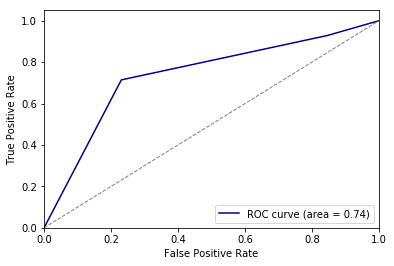


# 1 MLP
MLP 0.43 {'activation': 'tanh', 'early_stopping': False, 'hidden_layer_sizes': (40, 20, 10), 'learning_rate': 'invscaling', 'max_iter': 2000}


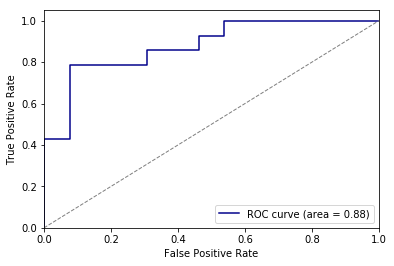


# 2 SVC
SVC 0.69 {'coef0': 0.0, 'gamma': 'scale', 'kernel': 'sigmoid', 'probability': True, 'shrinking': False}


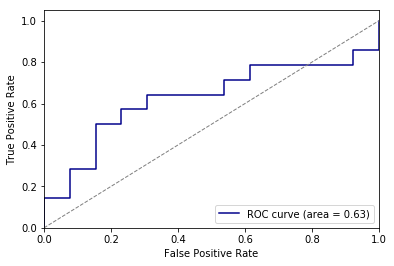


# 3 NB
NB 2.01 {}


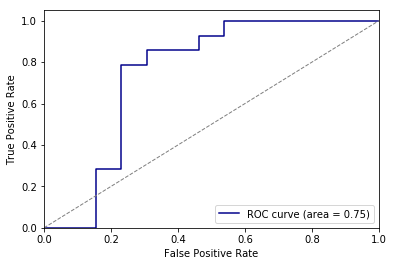


# 4 KNN
KNN 1.90 {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


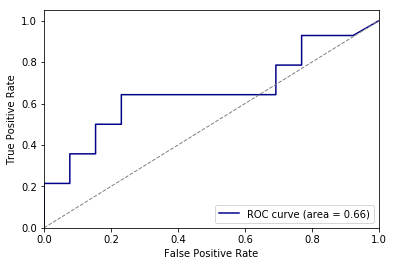


# 5 Bagging
Bagging 0.43 {'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 200}


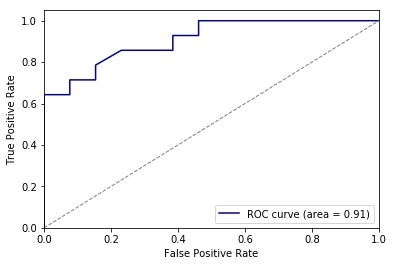


# 6 RF
RF 0.48 {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 20}


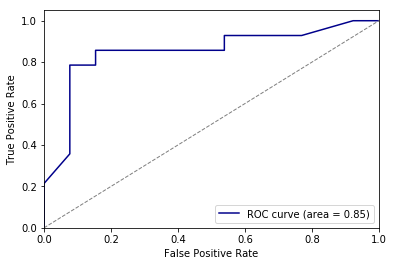


# 7 AdaBoost
AdaBoost 0.60 {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 10}


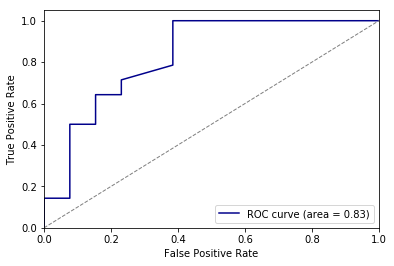


# 8 GB
GB 0.47 {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 50}


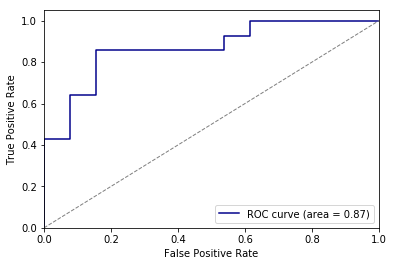


# 9 XGB
XGB 0.42 {'booster': 'gbtree', 'learning_rate': 1, 'min_child_weight': 5, 'n_estimators': 10}


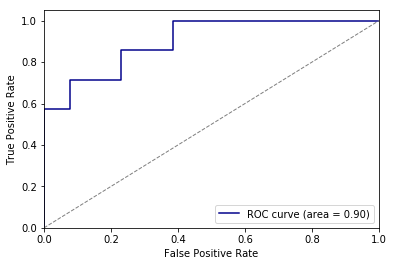

In [17]:
####################################################################
# 3 Train and Test Model

## 3.0 prepare
# singular estimators
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neural_network import MLPClassifier as MLPC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNNC

# ensembling estimators
from sklearn.ensemble import BaggingClassifier as BaggingC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import AdaBoostClassifier as AdaBoostC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from xgboost import XGBClassifier as XGB

# command to install xgboost:
# conda install -c conda-forge xgboost

# metrics
from sklearn.metrics import log_loss

# grid search cross validation
from sklearn.model_selection import GridSearchCV

# ignore ConverenceWarning
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

##################################
## 3.1 train and test models using GridSearchCV
models = {
    'DT': DTC(),
    'LR': LR(),
    'MLP': MLPC(),
    'SVC': SVC(),
    'NB': NB(),
    'KNN': KNNC(),
    'Bagging': BaggingC(),
    'RF': RFC(),
    'AdaBoost': AdaBoostC(),
    'GB': GBC(),
    'XGB': XGB(),
}

param_dict = {
    # 0.67 {'max_depth': 1, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
    'DT': {
        'max_depth': [1,2,3,None],
        'max_leaf_nodes': [4,6,8,10,None],
        'min_samples_leaf': [1,2,3],
        'min_samples_split': [2,4,6]
    },
    # LR 0.64 {'C': 5.0, 'class_weight': None, 'fit_intercept': False, 'penalty': 'l2', 'solver': 'sag'}
    'LR': {
        "solver": ['lbfgs', 'liblinear', 'sag', 'saga'],
        "penalty": ['l2'],
        "C": [1.0, 1.5, 2.0, 5.0, 10],
        "fit_intercept": [True, False],
        "class_weight": [None, 'balanced']
    },
    # MLP 0.63 {'activation': 'tanh', 'early_stopping': False, 'hidden_layer_sizes': (100, 100, 50), 'learning_rate': 'invscaling', 'max_iter': 1000}
    'MLP': {
        "max_iter": [500, 1000, 2000],
#         "hidden_layer_sizes": [(100,100,50)],
        "hidden_layer_sizes": [
            (40,20,10),
            (20,10,5),
            (10,5,5)
        ],
        "activation": ['tanh', 'relu'],
        "learning_rate": ['constant', 'invscaling', 'adaptive'],
        "early_stopping": [True, False],
    },
    # SVC 0.64 {'coef0': 0.5, 'gamma': 'scale', 'kernel': 'poly', 'probability': True, 'shrinking': False}
    'SVC': {
        "probability": [True],
#         "C": [5000, 10000, 20000, 30000],
        "kernel": ["poly", "rbf", "sigmoid"],
        "coef0": [0.0, 0.1, 0.2, 0.3, 0.5],
        "shrinking": [True, False],
        "gamma": ['scale', 'auto']
    },
    # NB 1.30 {}
    'NB': {
        # Nothing can be tuned
    },
    # KNN 0.71 {'algorithm': 'auto', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
    'KNN': {
        "n_neighbors": [1, 2, 3, 5, 7],
        "weights": ['uniform', 'distance'],
        "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
        "p": [1, 2, 3]
    },
    # Bagging 0.56 {'max_features': 0.8, 'max_samples': 0.3, 'n_estimators': 100}
    'Bagging': {
          "n_estimators": [10, 20, 50, 100, 200],
          "max_samples": [0.01, 0.1, 0.3, 0.5],
          "max_features": [0.5, 0.8, 1.0]
    },
    # RF 0.58 {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 50}
    'RF': {
        "n_estimators": [10, 20, 50, 100],
        "criterion": ["gini", "entropy"],
        "max_depth": [None, 5, 10, 20],
        "max_features": [None, "auto", "log2"]
    },
    # GB 0.38 {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 50}
    'GB': {
          "learning_rate": [0.005, 0.01, 0.05, 0.1],
          "n_estimators": [5, 10, 50, 100],
          "max_depth": [5, 10, 20],
          "max_features": [None, "auto", "log2"]
    },
    # AdaBoost 0.63 {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 5}
    'AdaBoost': {
        "n_estimators": [5, 10, 20, 50, 100, 200],
        "learning_rate": [0.01, 0.1, 1],
        "algorithm": ["SAMME", "SAMME.R"],
    },
    # XGB 0.55 {'booster': 'gbtree', 'learning_rate': 0.1, 'min_child_weight': 10, 'n_estimators': 100}
    'XGB': {
        "learning_rate": [0.01, 0.1, 1],
        "n_estimators": [10, 100, 200, 500],
        "min_child_weight": [5, 10, 20],
        "booster": ['gbtree', 'gblinear', 'dart']
    }
}

###################
# DEBUG
# fast
# selected_model_names = ['DT','SVC']

# mid
# selected_model_names = ['DT','SVC','NB','KNN',
#                         'Bagging','RF','AdaBoost','GB','XGB']

# all
selected_model_names = ['DT','MLP','SVC','NB','KNN',
                        'Bagging','RF','AdaBoost','GB','XGB']
###################

# function: grid search cross validation
# argument: model name, e.g. 'DT'
# return: trained GridSearchCV model
def _gscv(model, params, X_train, y_train):
    gscv = GridSearchCV(model, params, iid=True, cv=3, scoring="neg_log_loss")
    gscv.fit(X_train, list(y_train))
    return gscv

# function: test gscv model on the test data
# argument: trained gscv model
# return: an array of predicted probabilities of a classification of 1
def _test(gscv, X_test, y_test):
    # test on test data
    y_pred = gscv.predict_proba(X_test)
#     print("y_pred:\n", y_pred)
    
    # get metrics (log loss)
    print(model_name,"%.2f" % log_loss(list(y_test), y_pred), gscv.best_params_)

    # We only need the second column
    y_pred = y_pred[:,-1]
    return y_pred

# function: show the testing result
# arguments: y_pred, y_label
def _show_test_result(y_pred, y_label):
    df = pd.DataFrame()
    df['y_predict'] = y_pred
    df['y_label'] = y_label
    display(df)
    
# function: draw ROC
# arguments: y_pred, y_label
def _draw_roc(y_pred, y_label):
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_curve, auc

    y_label = y_label.astype(int)

    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_label, y_pred)
    roc_auc = auc(fpr, tpr)

    # Draw ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkblue',
             lw=1.5, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

# train and test on models
gscvs = {}
preds = {}
for i, model_name in enumerate(selected_model_names):
    print("#", i, model_name)
    
    # train model
    gscv = _gscv(models[model_name], param_dict[model_name], X_train, y_train)
    gscvs[model_name] = gscv
    
    # test model
    y_pred = _test(gscv, X_test, y_test)
    preds[model_name] = y_pred
    
    # show test results
#     _show_test_result(y_pred, y_test)

    # draw ROC
    _draw_roc(y_pred, y_test)
    
    print()

In [18]:
####################################################################
# 4 Predict on evaluation test data

## 4.1 load evaluation test dataset
test_values_url = dir_path + "Warm_Up_Machine_Learning_with_a_Heart_-_Test_Values.csv"
test_df = pd.read_csv(test_values_url)

## 4.2 pre-process
testset_ndarr = test_df.values
test_ids, test_values = np.split(testset_ndarr, [1], axis=1)
# print(test_values)

# encode test data
enc_test_values = prep.transform(test_values)
# print(enc_test_values)

# 4.3 predict 
preds = {}
for model_name in gscvs:
    gscv = gscvs[model_name]
    preds[model_name] = gscv.predict_proba(enc_test_values)
    
# print out predictions
# for m_n in preds:
#     print(m_n)
#     print(preds[m])
#     print()

In [19]:
####################################################################
# 5 output

# function: get current time in millis
# return: timestamp in millisecond
def _get_time_stamp():
    import time
    millis = int(round(time.time() * 1000))
    # print(millis)
    # print(type(millis))
    return millis

# function: export results to csv files
# argument: model name, header, patient ids, prediction probabilities
def _output(model_name, header, test_ids_list, pred):
    # export to DataFrame
    col_id_name = header[0]
    col_label_name = header[1]
    res_dict = {col_id_name: test_ids_list, col_label_name: pred[:,1]}
    res_df = pd.DataFrame.from_dict(res_dict)
    
    # write to csv file
    time_stamp = str(int(_get_time_stamp() / 1000))
    output_path = "./" + time_stamp + "-" + model_name + ".csv"
    res_df.to_csv(output_path, index=False)
    
# output predictions
header = labels_df.columns
test_ids_list = list(test_ids.flatten())

for model_name in preds:
    time_stamp = _get_time_stamp()
    _output(model_name, header, test_ids_list, preds[model_name])